# Limpeza de datasets

In [1]:
import datetime as dt
import locale
import numpy as np
import pandas as pd
from pydataset import data

In [2]:
locale.setlocale(locale.LC_ALL, '')
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Formato do dataset

### Valores nos títulos das colunas

In [3]:
df = data('USPersonalExpenditure').reset_index()
df.rename(columns={'index': 'categoria'}, inplace=True)
df

,categoria,1940,1945,1950,1955,1960
0,Food and Tobacco,22.20,44.50,59.60,73.20,86.80
1,Household Operation,10.50,15.50,29.00,36.50,46.20
2,Medical and Health,3.53,5.76,9.71,14.00,21.10
3,Personal Care,1.04,1.98,2.45,3.40,5.40
4,Private Education,0.34,0.97,1.80,2.60,3.64


In [4]:
df = pd.melt(
    df,
    id_vars=['categoria'],
    var_name='ano',
    value_name='valor'
)
df.head()

,categoria,ano,valor
0,Food and Tobacco,1940,22.20
1,Household Operation,1940,10.50
2,Medical and Health,1940,3.53
3,Personal Care,1940,1.04
4,Private Education,1940,0.34


### Mais de uma variável na mesma coluna

In [5]:
df = pd.read_csv('data/tuberculose.csv')
df

,uf,ano,m014,m1524,m2534,m3544,m4554,m5564,m65,mu,f014
0,MT,2016,0.00,0.00,1.00,0.00,0,0,0.00,nan,nan
1,BA,2016,2.00,4.00,4.00,6.00,5,12,10.00,nan,3.00
2,AM,2016,52.00,228.00,183.00,149.00,129,94,80.00,nan,93.00
3,TO,2016,0.00,0.00,0.00,0.00,0,0,1.00,nan,1.00
4,AL,2016,2.00,19.00,21.00,14.00,24,19,16.00,nan,3.00
5,ES,2016,2.00,152.00,130.00,131.00,63,26,21.00,nan,1.00
6,MG,2016,0.00,0.00,1.00,2.00,0,0,0.00,nan,0.00
7,SP,2016,186.00,999.00,1003.00,912.00,482,312,194.00,nan,247.00
8,RJ,2016,97.00,278.00,594.00,402.00,419,368,330.00,nan,121.00
9,AC,2016,nan,nan,nan,nan,1,1,nan,nan,nan


In [6]:
df = pd.melt(
    df,
    id_vars=['uf', 'ano'],
    value_name='casos',
    var_name='sexo_e_idade'
)
df.head()

,uf,ano,sexo_e_idade,casos
0,MT,2016,m014,0.00
1,BA,2016,m014,2.00
2,AM,2016,m014,52.00
3,TO,2016,m014,0.00
4,AL,2016,m014,2.00


In [7]:
tmp_df = df['sexo_e_idade'].str.extract(r'(\w)(\d+)(\d{2})', expand=False)
tmp_df.columns = ['sexo', 'idade_min', 'idade_max']
tmp_df.head()

,sexo,idade_min,idade_max
0,m,0,14
1,m,0,14
2,m,0,14
3,m,0,14
4,m,0,14


In [8]:
tmp_df['idade'] = tmp_df['idade_min'] + '-' + tmp_df['idade_max']
tmp_df.head()

,sexo,idade_min,idade_max,idade
0,m,0,14,0-14
1,m,0,14,0-14
2,m,0,14,0-14
3,m,0,14,0-14
4,m,0,14,0-14


In [9]:
df = pd.concat([df, tmp_df], axis=1)
df.head()

,uf,ano,sexo_e_idade,casos,sexo,idade_min,idade_max,idade
0,MT,2016,m014,0.00,m,0,14,0-14
1,BA,2016,m014,2.00,m,0,14,0-14
2,AM,2016,m014,52.00,m,0,14,0-14
3,TO,2016,m014,0.00,m,0,14,0-14
4,AL,2016,m014,2.00,m,0,14,0-14


In [10]:
df.drop(['sexo_e_idade', 'idade_min', 'idade_max'], axis=1, inplace=True)
df.head()

,uf,ano,casos,sexo,idade
0,MT,2016,0.00,m,0-14
1,BA,2016,2.00,m,0-14
2,AM,2016,52.00,m,0-14
3,TO,2016,0.00,m,0-14
4,AL,2016,2.00,m,0-14


In [11]:
df = df[['uf', 'ano', 'sexo', 'idade', 'casos']]
df.head()

,uf,ano,sexo,idade,casos
0,MT,2016,m,0-14,0.00
1,BA,2016,m,0-14,2.00
2,AM,2016,m,0-14,52.00
3,TO,2016,m,0-14,0.00
4,AL,2016,m,0-14,2.00


## Qualidade

In [12]:
df = pd.read_csv('data/contratos.csv')
df.head(10)

,numero,data_inicio,data_fim,valor,tipo,empresa
0,0001/2003,2003-01-01,2007-12-31,"R$ 600.000,00",Contratante,15461510000133 - FUNDAÇÃO UNIVERSIDADE FEDERAL DE MATO GROSSO DO SUL
1,0001/2003,2003-01-01,2007-12-31,"R$ 600.000,00",Contratada(s),02964393000189 - CONDOR TURISMO LTDA.
2,0001/2006,2006-01-02,2009-01-02,"R$ 300.000,00",Contratada(s),34028316165455 - EMPRESA BRASILEIRA DE CORREIOS E TELEGRAFOS
3,0001/2006,2006-01-02,2009-01-02,"R$ 300.000,00",Contratante,15461510000133 - FUNDAÇÃO UNIVERSIDADE FEDERAL DE MATO GROSSO DO SUL
4,0001/2007,2007-02-05,2007-08-04,"R$ 7.500,00",Contratante,15461510000133 - FUNDAÇÃO UNIVERSIDADE FEDERAL DE MATO GROSSO DO SUL
5,0001/2007,2007-02-05,2007-08-04,"R$ 7.500,00",Contratada(s),
6,0001/2008,2008-01-02,2010-04-07,"R$ 1.946.699,06",Contratante,15461510000133 - FUNDAÇÃO UNIVERSIDADE FEDERAL DE MATO GROSSO DO SUL
7,0001/2008,2008-01-02,2010-04-07,"R$ 1.946.699,06",Contratada(s),00922286000162 - AQUIDAUANA VIAGENS E TURISMO LTDA. - ME
8,0001/2009,2009-01-22,2012-01-21,"R$ 93.960,05",Contratada(s),00730538000151 - ODONTOPAN EQUIPAMENTOS MEDICOS E ODONTOLOGICOS LTDA
9,0001/2009,2009-01-22,2012-01-21,"R$ 93.960,05",Contratante,15461510000133 - FUNDAÇÃO UNIVERSIDADE FEDERAL DE MATO GROSSO DO SUL


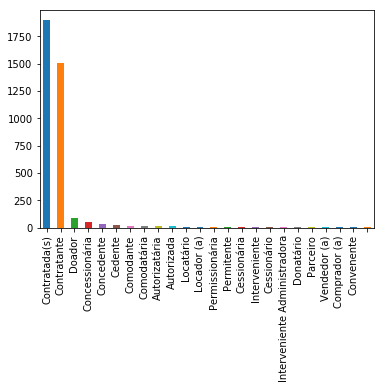

In [14]:
df.tipo.value_counts().plot(kind='bar')

In [15]:
df = df[df.tipo == 'Contratada(s)']
df.head()

,numero,data_inicio,data_fim,valor,tipo,empresa
1,0001/2003,2003-01-01,2007-12-31,"R$ 600.000,00",Contratada(s),02964393000189 - CONDOR TURISMO LTDA.
2,0001/2006,2006-01-02,2009-01-02,"R$ 300.000,00",Contratada(s),34028316165455 - EMPRESA BRASILEIRA DE CORREIOS E TELEGRAFOS
5,0001/2007,2007-02-05,2007-08-04,"R$ 7.500,00",Contratada(s),
7,0001/2008,2008-01-02,2010-04-07,"R$ 1.946.699,06",Contratada(s),00922286000162 - AQUIDAUANA VIAGENS E TURISMO LTDA. - ME
8,0001/2009,2009-01-22,2012-01-21,"R$ 93.960,05",Contratada(s),00730538000151 - ODONTOPAN EQUIPAMENTOS MEDICOS E ODONTOLOGICOS LTDA


In [16]:
def get_cnpj(empresa):
    try:
        cnpj = empresa[:14].strip()
    except:
        return np.nan
    
    if not cnpj:
        return np.nan
    
    return cnpj


df.empresa = df.empresa.apply(get_cnpj)
df.head()

,numero,data_inicio,data_fim,valor,tipo,empresa
1,0001/2003,2003-01-01,2007-12-31,"R$ 600.000,00",Contratada(s),02964393000189
2,0001/2006,2006-01-02,2009-01-02,"R$ 300.000,00",Contratada(s),34028316165455
5,0001/2007,2007-02-05,2007-08-04,"R$ 7.500,00",Contratada(s),NaN
7,0001/2008,2008-01-02,2010-04-07,"R$ 1.946.699,06",Contratada(s),00922286000162
8,0001/2009,2009-01-22,2012-01-21,"R$ 93.960,05",Contratada(s),00730538000151


In [17]:
df.dropna(inplace=True)

In [18]:
df.empresa.str.replace('[0-9]', '9').str.replace('[a-zA-ZÀ-Ÿ]', 'a').value_counts()

99999999999999    1728
aaaaaa aaaaaaa      11
aaaaaaa aaaaaa      11
aaaaa aaaaaaaa      10
aaaaaaaa aaaaa       6
aaaaa aaaaa aa       5
aaaaa aaaaaaa        5
aaaaaa aaaaaa        4
aaaaaaa aa aaa       3
aaaaaa aaaaa a       3
aaaaaa aa aaaa       3
aaaa aaaaaa          3
aaaaaaa aaaa a       2
aaaaaaaaa aa a       2
aaaa aaaaa aaa       1
aaaaa aaa aa a       1
aaaa aaaaaa aa       1
aaaaaaaaaa aaa       1
aaaaaa aaa aaa       1
aaaaaaa aaaaa        1
aaa aaaaaaaa a       1
aaaaaaa  aaaaa       1
aaaa aaaaaaa a       1
Name: empresa, dtype: int64

In [19]:
df = df[df.empresa.apply(lambda x: x.isnumeric())]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1728 entries, 1 to 3684
Data columns (total 6 columns):
numero         1728 non-null object
data_inicio    1728 non-null object
data_fim       1728 non-null object
valor          1728 non-null object
tipo           1728 non-null object
empresa        1728 non-null object
dtypes: object(6)
memory usage: 94.5+ KB


In [21]:
df.data_inicio = pd.to_datetime(df.data_inicio, format='%Y-%m-%d')
df.data_fim = pd.to_datetime(df.data_fim, format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1728 entries, 1 to 3684
Data columns (total 6 columns):
numero         1728 non-null object
data_inicio    1728 non-null datetime64[ns]
data_fim       1728 non-null datetime64[ns]
valor          1728 non-null object
tipo           1728 non-null object
empresa        1728 non-null object
dtypes: datetime64[ns](2), object(4)
memory usage: 94.5+ KB


In [22]:
df.valor.str.replace('[0-9]', '9').str.replace('[a-zA-ZÀ-Ÿ]', 'a').value_counts()

a$     9.999,99    581
a$    99.999,99    505
a$   999.999,99    348
a$ 9.999.999,99    128
a$       999,99     69
a$         9,99     58
a$ #.###.###,##     35
a$        99,99      4
Name: valor, dtype: int64

In [23]:
df = df[df.valor != 'R$ #.###.###,##']

In [24]:
df.valor.head()

1     R$   600.000,00
2     R$   300.000,00
7     R$ 1.946.699,06
8     R$    93.960,05
10    R$   180.000,00
Name: valor, dtype: object

In [25]:
df.valor = df.valor.str.replace(r'[^0-9\.\,]+', '')
df.valor.head()

1       600.000,00
2       300.000,00
7     1.946.699,06
8        93.960,05
10      180.000,00
Name: valor, dtype: object

In [26]:
df.valor = df.valor.map(locale.atof)
df.valor.head()

1     600000.00
2     300000.00
7    1946699.06
8      93960.05
10    180000.00
Name: valor, dtype: float64

In [27]:
df.describe()

,valor
count,1693.00
mean,278710.99
std,804329.72
min,0.00
25%,5250.00
50%,16000.00
75%,126135.79
max,8580635.17


In [28]:
def get_situacao(data_fim):
    if data_fim > dt.datetime.today():
        return 'Vigente'
    else:
        return 'Encerrado'
    
df.data_fim.apply(get_situacao).value_counts()

Encerrado    1385
Vigente       308
Name: data_fim, dtype: int64

In [29]:
df['situacao'] = df.data_fim.apply(get_situacao)
df.head()

,numero,data_inicio,data_fim,valor,tipo,empresa,situacao
1,0001/2003,2003-01-01,2007-12-31,600000.00,Contratada(s),02964393000189,Encerrado
2,0001/2006,2006-01-02,2009-01-02,300000.00,Contratada(s),34028316165455,Encerrado
7,0001/2008,2008-01-02,2010-04-07,1946699.06,Contratada(s),00922286000162,Encerrado
8,0001/2009,2009-01-22,2012-01-21,93960.05,Contratada(s),00730538000151,Encerrado
10,0001/2010-N,2010-01-07,2011-01-06,180000.00,Contratada(s),07854179000193,Encerrado


In [30]:
len(df) == len(df.numero.unique())

False

In [31]:
df.duplicated(subset=['numero']).value_counts()

False    1222
True      471
dtype: int64

In [32]:
df.drop_duplicates(subset=['numero'], inplace=True)

In [33]:
len(df) == len(df.numero.unique())

True

In [34]:
df.head(10)

,numero,data_inicio,data_fim,valor,tipo,empresa,situacao
1,0001/2003,2003-01-01,2007-12-31,600000.00,Contratada(s),02964393000189,Encerrado
2,0001/2006,2006-01-02,2009-01-02,300000.00,Contratada(s),34028316165455,Encerrado
7,0001/2008,2008-01-02,2010-04-07,1946699.06,Contratada(s),00922286000162,Encerrado
8,0001/2009,2009-01-22,2012-01-21,93960.05,Contratada(s),00730538000151,Encerrado
10,0001/2010-N,2010-01-07,2011-01-06,180000.00,Contratada(s),07854179000193,Encerrado
13,0001/2011,2011-01-12,2016-01-11,239339.53,Contratada(s),01701201000189,Encerrado
15,0001/2012,2012-01-02,2013-12-31,439050.00,Contratada(s),10673078000120,Encerrado
17,0001/2014,2014-01-03,2015-01-02,7499.00,Contratada(s),03356964000165,Encerrado
21,0001/2015,2015-02-03,2019-03-26,7211817.31,Contratada(s),73505349000230,Vigente
25,0001/2018,2018-02-01,2019-01-31,50494.00,Contratada(s),06235877000148,Vigente
